# Imports

In [1]:
%load_ext autoreload
%autoreload 2
    
import os
import sys
from typing import (
    Any,
    Dict,
    List
)

import numpy as np
from numpy import ndarray

import pandas as pd
from pandas import DataFrame

from sklearn.model_selection import (
    GridSearchCV,   
    LeaveOneOut,
    train_test_split
)
from sklearn.linear_model import Ridge

# Constants

In [2]:
DATA: str = "data"
DATASET_NAME: str = "2023-10-13-corrosion_inhibition_dataset_gp.csv"

# Paths

In [3]:
# Main Path
main_path: str = os.path.dirname(os.getcwd())

# Place the main path on python path if not already there
if main_path not in sys.path:
    sys.path.insert(0, main_path)

# Data Path
data_path: str = os.path.join(main_path, DATA)

In [4]:
display(main_path)
display(data_path)

'C:\\Users\\petar\\PycharmProjects\\CorrosionInhibitorsQSPR'

'C:\\Users\\petar\\PycharmProjects\\CorrosionInhibitorsQSPR\\data'

# Corrosion package imports

In [5]:
%load_ext autoreload
%autoreload 2
    
from corrosion.analysis import Analyzer
from corrosion.applicability_domain import ApplicabilityDomain
from corrosion.enums import MetricType
from corrosion.metrics import Metrics
from corrosion.regressors import (
    get_pca_ridge_model,
    PcaRidge
)
from corrosion.visuals import CorrosionVisualizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Loading

In [6]:
# Load Data
dataset_path: str = os.path.join(data_path, DATASET_NAME)
data_df: DataFrame = pd.read_csv(dataset_path)

In [7]:
display(data_df)

,ID,Name,SMILES,Inhibitor Efficiency,NEW Inhibitor Efficiency,Dipole Moment,Polarisability,HOMO,LUMO,Band Gap,...,Electron Donor Capacity,Electron Acceptor Capacity,ΔN,NBO Charge on N,log P,Solvent Accessible SA,VDW Surface Area,VDW Volume,PAE,EXP(PAE)
0,gp_0001,4-dimethylaminopyridine,CN(C)c1ccncc1,0.410,1.786009,4.959540,103.5460,-5.129070,-1.136340,3.992730,...,4.127302,0.386300,0.409787,-0.47403,0.86,321.40,213.42,125.37,-2.663340,0.069715
1,gp_0002,"2,4,6-trimethylpyridine",Cc1cc(C)nc(C)c1,0.210,1.583658,1.978380,106.4510,-5.683370,-1.562200,4.121170,...,5.003569,0.439944,0.245983,-0.47866,1.53,377.30,226.52,129.41,-2.561180,0.077214
2,gp_0003,"2,6-dimethylpyridine",Cc1cccc(C)n1,0.133,1.421263,1.452400,91.8567,-5.753850,-1.706150,4.047700,...,3.640641,0.089218,0.332872,-0.47357,1.02,333.10,193.85,112.57,-2.522240,0.080280
3,gp_0004,4-methoxypyridine,COc1ccncc1,0.144,1.450566,3.438520,82.8424,-5.889900,-1.492000,4.397900,...,4.317681,0.090149,0.219337,-0.45851,0.60,303.79,175.45,104.77,-2.251314,0.105261
4,gp_0005,4-methylpyridine,Cc1ccncc1,0.119,1.379620,2.879190,77.0511,-5.871940,-1.744520,4.127420,...,4.807637,0.415376,0.272011,-0.44142,1.27,281.94,160.69,95.82,-2.588964,0.075098
5,gp_0006,2-methylpyridine,Cc1ccccn1,0.091,1.276551,1.902840,77.3130,-5.851810,-1.803020,4.048790,...,4.730089,0.406904,0.283282,-0.45247,0.89,287.86,160.89,95.78,-2.540394,0.078835
6,gp_0007,4-benzylpyridine,C(c1ccccc1)c2ccncc2,0.552,1.857005,2.805070,146.6650,-5.865410,-1.809550,4.055860,...,4.559530,0.473816,0.347983,-0.44029,2.85,369.73,266.54,167.93,-2.723490,0.065645
7,gp_0008,3-methylpyridine,Cc1cccnc1,0.068,1.161168,2.618710,76.8446,-5.847720,-1.838130,4.009590,...,4.263451,0.181243,0.271513,-0.43219,1.27,281.70,160.78,95.82,-2.550077,0.078076
8,gp_0010,pyridine,c1ccncc1,0.059,1.103902,2.326140,62.7542,-5.960920,-1.910780,4.050140,...,4.884148,0.414102,0.257745,-0.43496,0.76,245.60,127.94,78.98,-2.559219,0.077365
9,gp_0012,3-hydroxypyridine,Oc1cccnc1,0.103,1.324570,3.593400,69.3699,-5.950860,-1.901800,4.049060,...,4.888102,0.157439,0.172388,-0.41988,0.45,250.06,138.98,87.20,-2.511002,0.081187


In [8]:
data_quinolines_df: DataFrame = data_df[data_df.Name.str.contains("quinoline")].reset_index(drop=True)

In [9]:
data_quinolines_df

,ID,Name,SMILES,Inhibitor Efficiency,NEW Inhibitor Efficiency,Dipole Moment,Polarisability,HOMO,LUMO,Band Gap,...,Electron Donor Capacity,Electron Acceptor Capacity,ΔN,NBO Charge on N,log P,Solvent Accessible SA,VDW Surface Area,VDW Volume,PAE,EXP(PAE)
0,gp_0028,8-methylquinoline,Cc1cccc2cccnc12,0.743,1.913434,1.55183,128.621,-5.712760,-2.446840,3.265920,...,4.716972,0.579751,0.359762,-0.43518,2.64,335.96,223.81,139.78,-3.56339,0.028343
1,gp_0029,3-aminoquinoline,Nc1cnc2ccccc2c1,1.254,1.975101,3.21111,131.564,-5.171520,-2.259360,2.912160,...,3.628858,0.217359,0.433400,-0.41431,1.30,309.54,207.34,134.44,-3.59809,0.027376
2,gp_0030,quinoline,c1ccc2ncccc2c1,0.383,1.767898,2.12713,114.753,-5.954670,-2.529840,3.424830,...,6.593774,0.797233,0.107242,-0.42625,2.13,300.62,191.58,122.95,-3.60769,0.027114
3,gp_0032,3-bromoquinoline,Brc1cnc2ccccc2c1,1.619,1.989430,2.32938,141.164,-6.059970,-2.800320,3.259650,...,5.218243,0.788727,0.329634,-0.40620,2.90,323.33,212.57,141.18,-3.73742,0.023815
4,gp_0033,3-chloroquinoline,Clc1cnc2ccccc2c1,1.771,1.992579,2.31923,131.585,-6.080110,-2.783450,3.296660,...,5.213111,0.765140,0.321597,-0.40762,2.73,318.43,208.48,136.88,-3.57722,0.027953
5,gp_0040,8-isopropylquinoline,CC(C)c1cccc2cccnc12,0.912,1.943266,2.69516,113.811,-5.894806,-2.520320,3.374486,...,4.856461,0.596438,0.334301,-0.43534,1.75,296.13,191.39,122.95,-3.25638,0.038528
6,gp_0039,isoquinoline,c1ccc2cnccc2c1,0.642,1.887598,1.57908,155.449,-5.696707,-2.445761,3.250946,...,4.695136,0.592588,0.371147,-0.43910,3.38,377.63,283.15,173.88,-3.59184,0.027548
7,gp_0023,2-methylquinoline,Cc1ccc2ccccc2n1,0.847,1.933369,1.80430,131.101,-5.838470,-2.366570,3.471900,...,6.349549,0.729845,0.124397,-0.44681,2.26,348.37,224.47,139.75,-3.78871,0.022625
8,gp_0024,6-methylquinoline,Cc1ccc2ncccc2c1,0.850,1.933865,2.40732,130.876,-5.812080,-2.412290,3.399790,...,4.726639,0.563719,0.350136,-0.42640,2.64,343.10,224.26,139.79,-3.50546,0.030033
9,gp_0025,4-methylquinoline,Cc1ccnc2ccccc12,1.053,1.959751,2.64669,128.300,-5.839560,-2.442760,3.396800,...,4.821549,0.604441,0.345838,-0.43157,2.64,330.66,223.68,139.81,-3.51704,0.029687


# Data Analysis

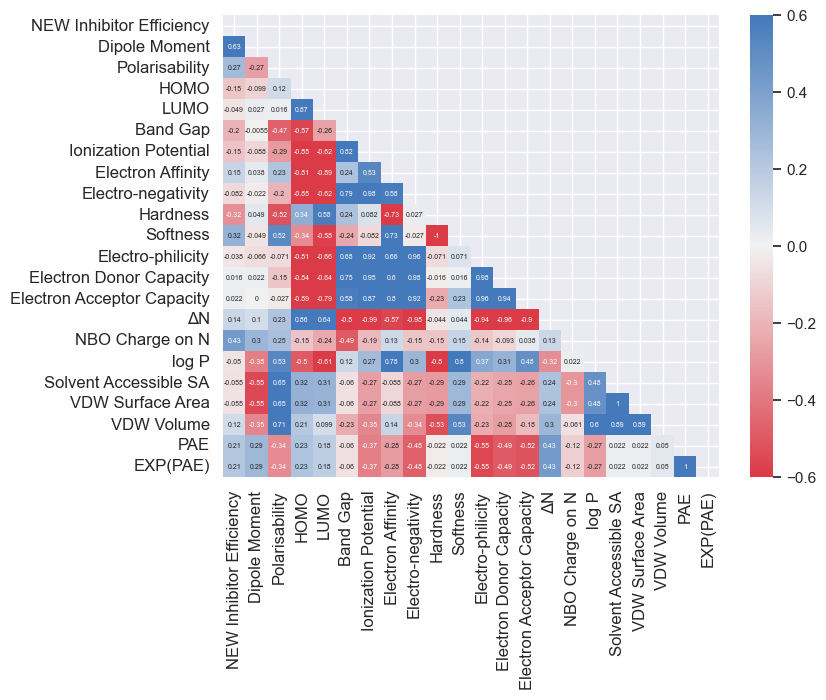

In [10]:
# Get the correlation matrix
correlation_df = data_quinolines_df.iloc[:, 4:].corr(method='spearman')  # 4 from the data (first three are labels)
CorrosionVisualizer.correlation_heatmap(correlation_df)

In [11]:
# Get X
_x_df: DataFrame = data_quinolines_df.iloc[:, 3:].drop(
    columns=["PAE", "EXP(PAE)", "Inhibitor Efficiency", "NEW Inhibitor Efficiency"],
    errors="ignore"
)
_x: ndarray = _x_df.values
_x_labels: List[str] = list(_x_df.columns)

# Number of compounds & features
m: int
n: int
m, n = _x.shape

# Get Y
_ys_df: DataFrame = data_quinolines_df[["PAE", "Inhibitor Efficiency"]]
_y_theoretical: ndarray = data_quinolines_df["PAE"]
_y_experimenmmtal: ndarray = data_quinolines_df["Inhibitor Efficiency"]

In [12]:
display(_x_df.head())

,Dipole Moment,Polarisability,HOMO,LUMO,Band Gap,Ionization Potential,Electron Affinity,Electro-negativity,Hardness,Softness,Electro-philicity,Electron Donor Capacity,Electron Acceptor Capacity,ΔN,NBO Charge on N,log P,Solvent Accessible SA,VDW Surface Area,VDW Volume
0,1.55183,128.621,-5.71276,-2.44684,3.26592,8.115933,0.158509,4.137221,3.978712,0.251338,2.151022,4.716972,0.579751,0.359762,-0.43518,2.64,335.96,223.81,139.78
1,3.21111,131.564,-5.17152,-2.25936,2.91216,7.551438,-0.728439,3.411500,4.139939,0.241549,1.405616,3.628858,0.217359,0.433400,-0.41431,1.30,309.54,207.34,134.44
2,2.12713,114.753,-5.95467,-2.52984,3.42483,11.407493,0.185589,5.796541,5.610952,0.178223,2.994134,6.593774,0.797233,0.107242,-0.42625,2.13,300.62,191.58,122.95
3,2.32938,141.164,-6.05997,-2.80032,3.25965,8.328514,0.530519,4.429517,3.898998,0.256476,2.516110,5.218243,0.788727,0.329634,-0.40620,2.90,323.33,212.57,141.18
4,2.31923,131.585,-6.08011,-2.78345,3.29666,8.415719,0.480222,4.447970,3.967748,0.252032,2.493157,5.213111,0.765140,0.321597,-0.40762,2.73,318.43,208.48,136.88


In [13]:
display(_ys_df.head())

,PAE,Inhibitor Efficiency
0,-3.56339,0.743
1,-3.59809,1.254
2,-3.60769,0.383
3,-3.73742,1.619
4,-3.57722,1.771


# Approaches

1. PCA Analysis to determine which features are relevant?
2. Predict only the computational adsorption energy
3. Co-train the computational & experimental adsorption energies
4. Use both linear and non-linear models (ANN? RFs?)
5. General approach:
   - Train/Test Split (Holdout set)
   - Cross-validation
   - Grid search to optimize the hyper-parameters
   - Validate by analysing the metrics, applicability domain
   - Stack of multiple regressors?

# Train/Test Split

In [14]:
BT_RATIO: float = 0.2
RANDOM_SEED: int = 12345

In [15]:
_x_train, _x_bt, _y_theoretical_train, _y_theoretical_bt, _y_exp_train, _y_exp_bt = train_test_split(
    _x, 
    _y_theoretical,
    _y_experimenmmtal,
    test_size=BT_RATIO,
    random_state=RANDOM_SEED
)

In [16]:
# Display shapes for confirmation
display(_x_train.shape)
display(_x_bt.shape)
display(_y_theoretical_train.shape)
display(_y_theoretical_bt.shape)
display(_y_exp_train.shape)
display(_y_exp_bt.shape)

(10, 19)

(3, 19)

(10,)

(3,)

(10,)

(3,)

# Model 1. PCA-Ridge (Theoretical Model)

### Model Training

In [17]:
param_grid = {
    "n_components": range(2, 8),
    "alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100]
}

In [18]:
_pca_ridge_theoretical: GridSearchCV = get_pca_ridge_model(
    param_grid=param_grid,
    cv=LeaveOneOut()
)

In [19]:
_pca_ridge_theoretical.fit(_x_train, _y_theoretical_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=3; total time=   0.0s
[CV] END ........................alpha=1e-05, 

GridSearchCV(cv=LeaveOneOut(), estimator=PcaRidge(), n_jobs=1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                   100],
                         'n_components': range(2, 8)},
             scoring='neg_root_mean_squared_error', verbose=2)

In [20]:
print(
    f"Optimal parameters for theoretical model: "
    f"n(PCs) = {_pca_ridge_theoretical.best_estimator_.n_components}; "
    f"alpha = {_pca_ridge_theoretical.best_estimator_.alpha}; "
    f"RMSECV = {-_pca_ridge_theoretical.best_score_}."
)

Optimal parameters for theoretical model: n(PCs) = 3; alpha = 10; RMSECV = 0.08082661934123955.


### Model Analysis

In [21]:
_y_theoretical_train_hat: ndarray = _pca_ridge_theoretical.predict(_x_train).ravel()
_y_theoretical_bt_hat: ndarray = _pca_ridge_theoretical.predict(_x_bt).ravel()

### Metrics & Visuals

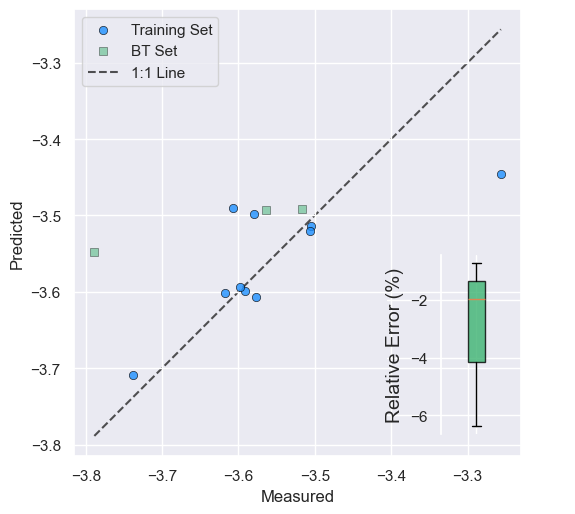

In [42]:
CorrosionVisualizer.predictive_ability_plot(
    y_train=_y_theoretical_train,
    y_train_hat=_y_theoretical_train_hat,
    y_bt=_y_theoretical_bt,
    y_bt_hat=_y_theoretical_bt_hat
)

In [43]:
_pca_ridge_metrics: Dict[str, Any] = {
    "RMSE(train)": Metrics.get_metric(
        y=_y_theoretical_train,
        y_hat=_y_theoretical_train_hat,
        metric_type=MetricType.RMSE
    ),
    "RMSE(BT)": Metrics.get_metric(
        y=_y_theoretical_bt,
        y_hat=_y_theoretical_bt_hat,
        metric_type=MetricType.RMSE
    )
}
_pca_ridge_metrics_df: DataFrame = pd.DataFrame.from_dict(
    _pca_ridge_metrics,
    orient="index"
)
display(_pca_ridge_metrics_df)

,0
RMSE(train),0.076609
RMSE(BT),0.145837


### Applicability Domain

In [44]:
(
    hat_star,
    hat_train, hat_validation, hat_bt,
    res_scaled_train, res_scaled_validation, res_scaled_bt
) = ApplicabilityDomain.calculate(
    x_train=_x_train,
    y_train=_y_theoretical_train,
    y_train_hat=_y_theoretical_train_hat,
    x_bt=_x_bt,
    y_bt=_y_theoretical_bt,
    y_bt_hat=_y_theoretical_bt_hat
)

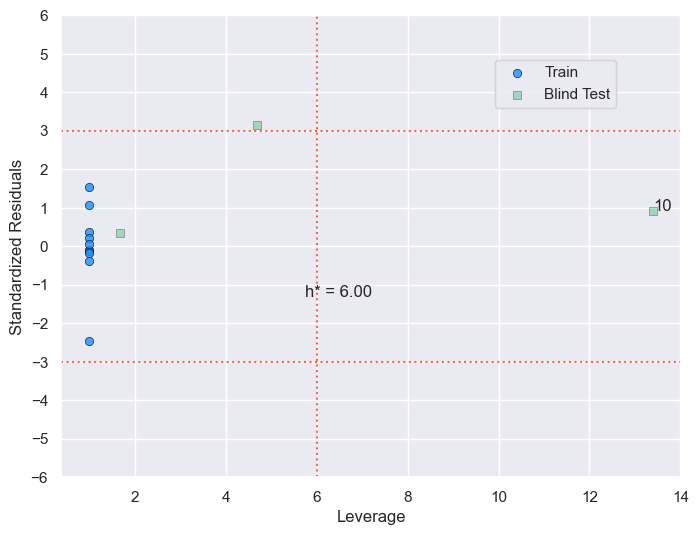

In [45]:
CorrosionVisualizer.applicability_domain_plot(
    hat_star=hat_star,
    hat_train=hat_train,
    res_scaled_train=res_scaled_train,
    hat_bt=hat_bt,
    res_scaled_bt=res_scaled_bt
)

# Model 2. Ridge (Theoretical Model)

### Model Training

In [46]:
param_grid = {
    "alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100]
}

In [47]:
_ridge_theoretical: GridSearchCV = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    verbose=2,
    n_jobs=1,
    cv=LeaveOneOut()
)

In [48]:
_ridge_theoretical.fit(_x_train, _y_theoretical_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................

GridSearchCV(cv=LeaveOneOut(), estimator=Ridge(), n_jobs=1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                   100]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [49]:
print(
    f"Optimal parameters for theoretical model: "
    f"alpha = {_ridge_theoretical.best_estimator_.alpha}; "
    f"RMSECV = {-_ridge_theoretical.best_score_}."
)

Optimal parameters for theoretical model: alpha = 50; RMSECV = 0.09340944205069306.


### Model Analysis

In [50]:
_y_theoretical_train_hat: ndarray = _ridge_theoretical.predict(_x_train).ravel()
_y_theoretical_bt_hat: ndarray = _ridge_theoretical.predict(_x_bt).ravel()

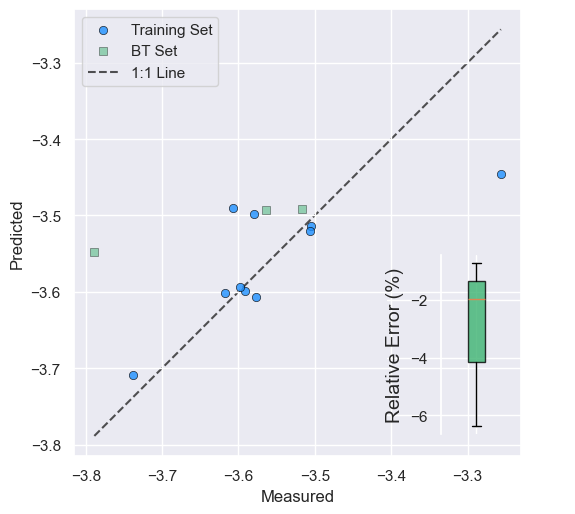

In [51]:
CorrosionVisualizer.predictive_ability_plot(
    y_train=_y_theoretical_train,
    y_train_hat=_y_theoretical_train_hat,
    y_bt=_y_theoretical_bt,
    y_bt_hat=_y_theoretical_bt_hat
)

In [52]:
_pca_ridge_metrics: Dict[str, Any] = {
    "RMSE(train)": Metrics.get_metric(
        y=_y_theoretical_train,
        y_hat=_y_theoretical_train_hat,
        metric_type=MetricType.RMSE
    ),
    "RMSE(BT)": Metrics.get_metric(
        y=_y_theoretical_bt,
        y_hat=_y_theoretical_bt_hat,
        metric_type=MetricType.RMSE
    )
}
_pca_ridge_metrics_df: DataFrame = pd.DataFrame.from_dict(
    _pca_ridge_metrics,
    orient="index"
)
display(_pca_ridge_metrics_df)

,0
RMSE(train),0.076609
RMSE(BT),0.145837


### Applicability Domain

In [53]:
(
    hat_star,
    hat_train, hat_validation, hat_bt,
    res_scaled_train, res_scaled_validation, res_scaled_bt
) = ApplicabilityDomain.calculate(
    x_train=_x_train,
    y_train=_y_theoretical_train,
    y_train_hat=_y_theoretical_train_hat,
    x_bt=_x_bt,
    y_bt=_y_theoretical_bt,
    y_bt_hat=_y_theoretical_bt_hat
)

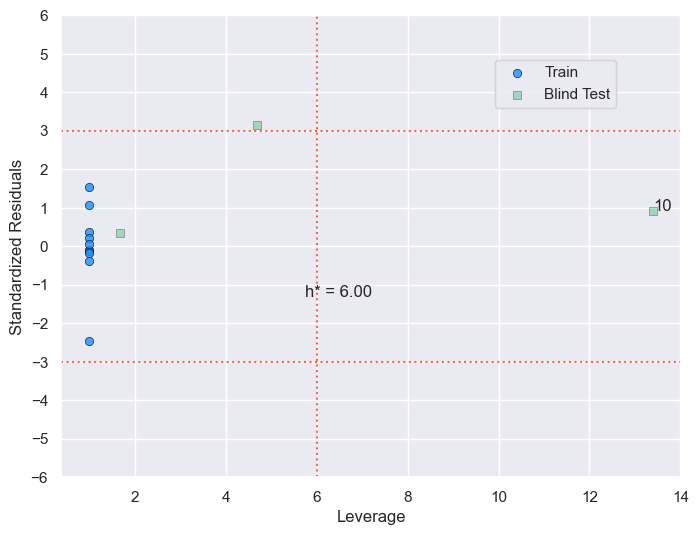

In [54]:
CorrosionVisualizer.applicability_domain_plot(
    hat_star=hat_star,
    hat_train=hat_train,
    res_scaled_train=res_scaled_train,
    hat_bt=hat_bt,
    res_scaled_bt=res_scaled_bt
)

In [55]:
data_df.loc[32, :]

ID                                   gp_0039
Name                            isoquinoline
SMILES                        c1ccc2cnccc2c1
Inhibitor Efficiency                   0.642
NEW Inhibitor Efficiency            1.887598
Dipole Moment                        1.57908
Polarisability                       155.449
HOMO                               -5.696707
LUMO                               -2.445761
Band Gap                            3.250946
Ionization Potential                8.005927
Electron Affinity                   0.199169
Electro-negativity                  4.102548
Hardness                            3.903379
Softness                            0.256188
Electro-philicity                    2.15594
Electron Donor Capacity             4.695136
Electron Acceptor Capacity          0.592588
ΔN                                  0.371147
NBO Charge on N                      -0.4391
log P                                   3.38
Solvent Accessible SA                 377.63
VDW Surfac

In [56]:
data_df.loc[21, :]

ID                                        gp_0038
Name                          2-isopropylpyridine
SMILES                              CC(C)c1ccccn1
Inhibitor Efficiency                        0.078
NEW Inhibitor Efficiency                 1.215894
Dipole Moment                             1.80296
Polarisability                            103.381
HOMO                                    -5.839839
LUMO                                    -1.792687
Band Gap                                 4.047152
Ionization Potential                      8.86109
Electron Affinity                       -0.654833
Electro-negativity                       4.103129
Hardness                                 4.757961
Softness                                 0.210174
Electro-philicity                         1.76921
Electron Donor Capacity                  4.415519
Electron Acceptor Capacity               0.312391
ΔN                                       0.304424
NBO Charge on N                          -0.45663
